In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 9s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = ["airplane", "automobile", "bird", "cat",
         "deer", "dog", "frog", "horse", "ship", "truck"]

ship


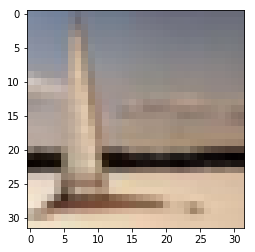

In [4]:
import matplotlib.pyplot as plt
import random
c = random.randint(0, 49999)
print(trans[y_train[c][0]])
plt.imshow(x_train[c])

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
cnn = Sequential()
# 1filter 3 * 3 * 3  * (64) + 64(bias) = 1792
cnn.add(Conv2D(64, (3, 3), 
               padding="same", 
               activation="relu", 
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(128, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(512, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(512, activation="relu"))
cnn.add(Dense(128, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

W0830 08:51:06.596043 140546618480512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 08:51:06.641399 140546618480512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 08:51:06.651330 140546618480512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 08:51:06.678757 140546618480512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 512)        

In [6]:
from keras.utils.np_utils import to_categorical
x_train_norm = x_train / 255
x_test_norm = x_test / 255
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
# 1: sigmoid + binary_crossentropy
# >2: softmax + categorical_crossentropy
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

W0830 08:51:07.820145 140546618480512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0830 08:51:07.853025 140546618480512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
# batch_size: 看多少筆再調整
# epochs: 整本書要看幾遍(控制模型最好的重要關鍵)
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200,
        epochs=10,
        validation_split=0.1,
        verbose=2)

W0830 08:51:18.772041 140546618480512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0830 08:51:18.863585 140546618480512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 19s - loss: 1.6160 - acc: 0.4006 - val_loss: 1.2445 - val_acc: 0.5496
Epoch 2/10
 - 12s - loss: 1.1137 - acc: 0.6001 - val_loss: 0.9638 - val_acc: 0.6614
Epoch 3/10
 - 12s - loss: 0.8519 - acc: 0.6988 - val_loss: 0.7857 - val_acc: 0.7250
Epoch 4/10
 - 12s - loss: 0.6927 - acc: 0.7600 - val_loss: 0.7403 - val_acc: 0.7450
Epoch 5/10
 - 12s - loss: 0.5556 - acc: 0.8052 - val_loss: 0.7082 - val_acc: 0.7582
Epoch 6/10
 - 12s - loss: 0.4510 - acc: 0.8416 - val_loss: 0.7035 - val_acc: 0.7658
Epoch 7/10
 - 12s - loss: 0.3393 - acc: 0.8823 - val_loss: 0.7097 - val_acc: 0.7782
Epoch 8/10
 - 12s - loss: 0.2278 - acc: 0.9222 - val_loss: 0.7961 - val_acc: 0.7738
Epoch 9/10
 - 12s - loss: 0.1751 - acc: 0.9387 - val_loss: 0.8530 - val_acc: 0.7712
Epoch 10/10
 - 12s - loss: 0.1227 - acc: 0.9571 - val_loss: 0.8837 - val_acc: 0.7826


In [9]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 2s 235us/step


[0.9621178517341614, 0.7648]